In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
pd.set_option('display.max_columns', None)


In [2]:
X_train = pd.read_csv('Modeling_Datasets/X_train_processed.csv')
X_val = pd.read_csv('Modeling_Datasets/X_val_processed.csv')
X_test = pd.read_csv('Modeling_Datasets/X_test_processed.csv')

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(17820, 459)
(7638, 459)
(10911, 459)


In [4]:
y_train = pd.read_csv('Modeling_Datasets/y_train_regression.csv', index_col=[0])
y_val = pd.read_csv('Modeling_Datasets/y_val_regression.csv', index_col=[0])
y_test = pd.read_csv('Modeling_Datasets/y_test_regression.csv', index_col=[0])

In [5]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(17820, 0)
(7638, 0)
(10911, 0)


In [6]:
y_train.reset_index(inplace=True)
y_val.reset_index(inplace=True)
y_test.reset_index(inplace=True)

In [7]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

In [8]:
print(f'New y_train shape: {y_train.shape}')
print(f'New y_val shape: {y_val.shape}')
print(f'New y_test shape: {y_test.shape}')

New y_train shape: (17820,)
New y_val shape: (7638,)
New y_test shape: (10911,)


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

In [10]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeRegressor(max_depth = depth)
    
    # fit
    dt_model.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/

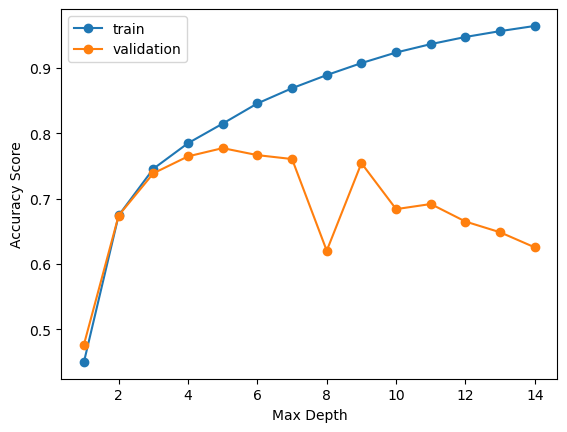

In [11]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [12]:
max_depth = np.argmax(val_accs)
max_depth

4

Now let's see how this model does with a `max_depth` of $4$ on the testing data:

In [13]:
dt_model_tuned = DecisionTreeRegressor(max_depth = 4)

dt_model_tuned.fit(X_train, y_train)

training_score = dt_model_tuned.score(X_train, y_train)
testing_score = dt_model_tuned.score(X_test, y_test)

print(f'Training Score: {round(training_score, 3)}')
print(f'Testing Score: {round(testing_score, 3)}')

Training Score: 0.785
Testing Score: 0.768


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [14]:
y_pred = dt_model_tuned.predict(X_test)
r2_score(y_test, y_pred)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.7675021172608011

Not bad! We were able to predict a host's review score with ~77% accuracy.

In [15]:
from sklearn.tree import plot_tree

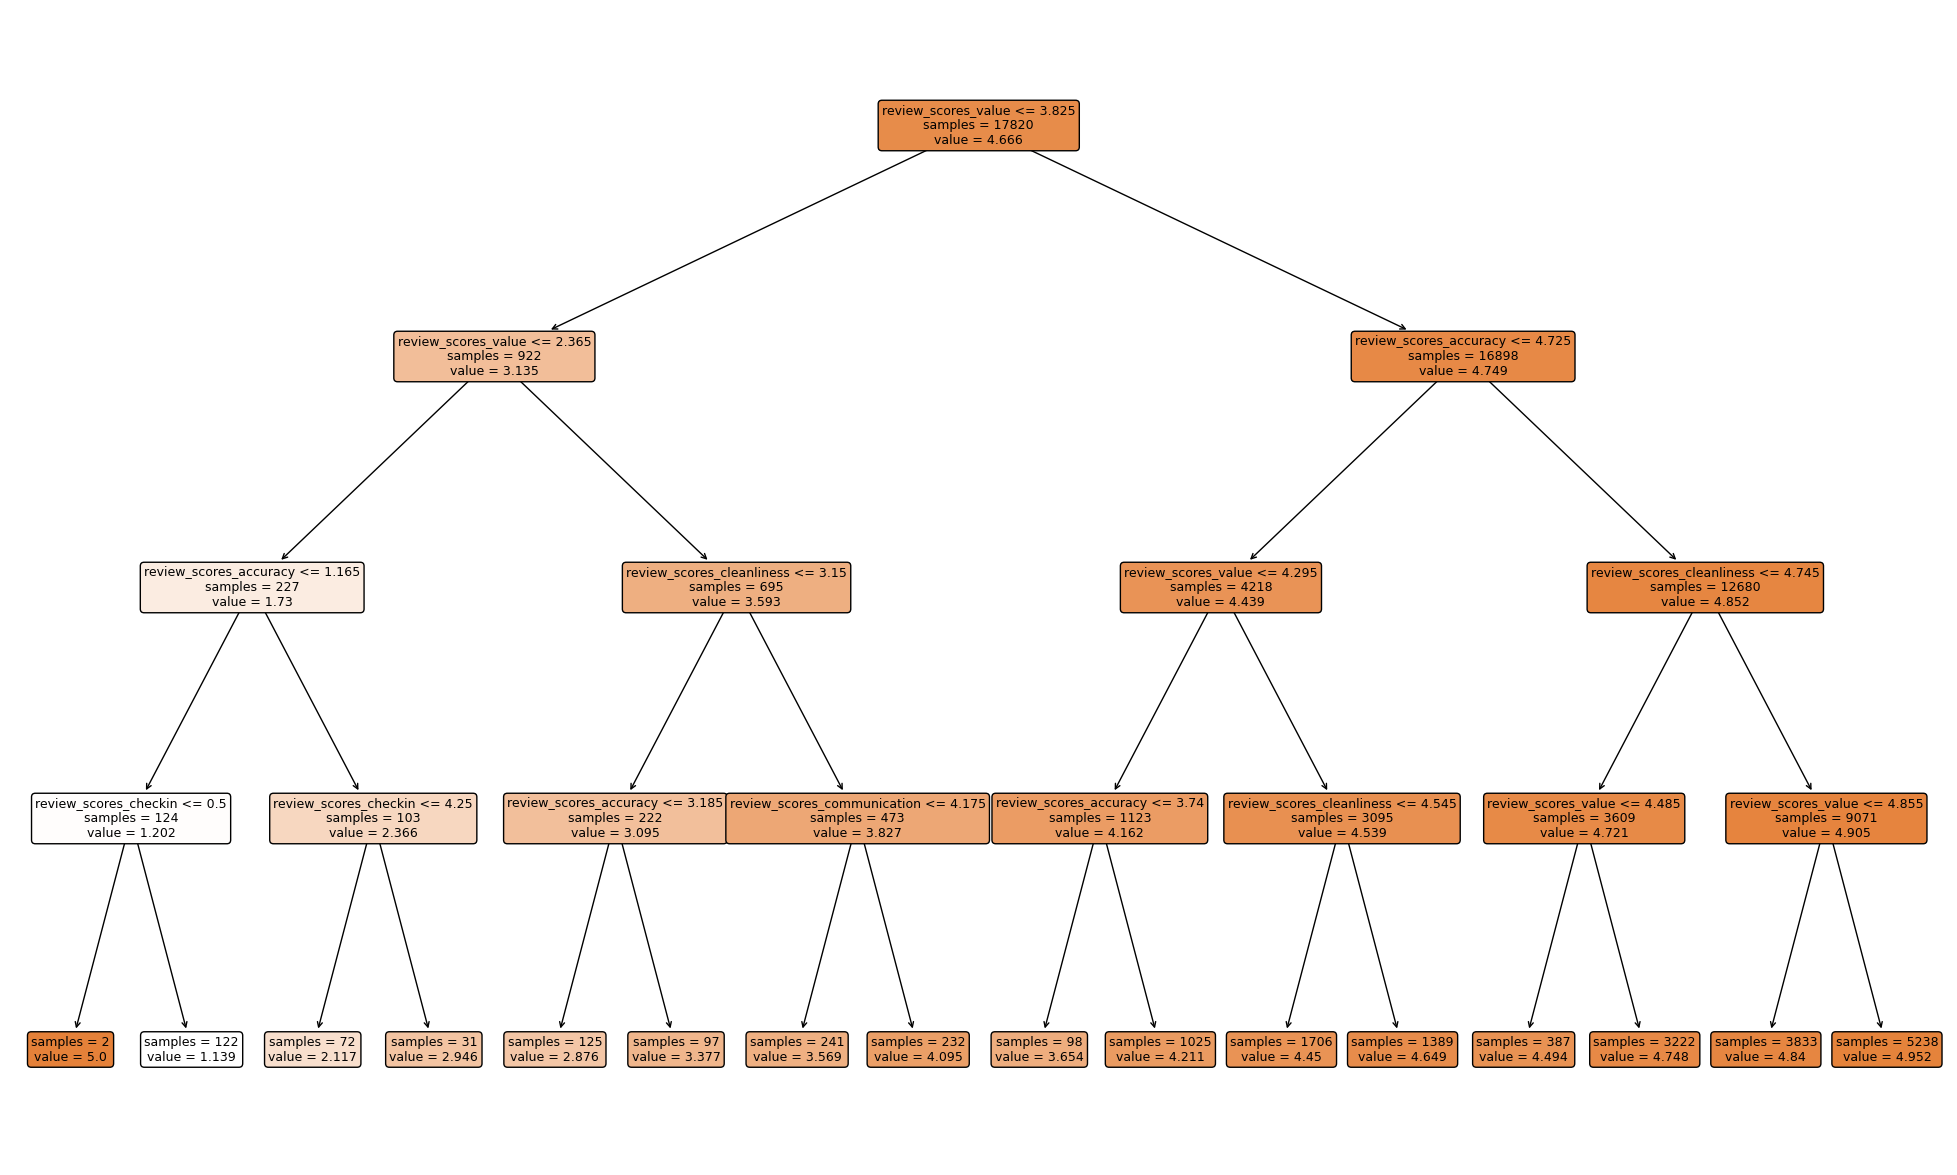

In [16]:
fig, ax = plt.subplots(figsize=(25, 15))

plot_tree(dt_model_tuned,
         feature_names=X_test.columns,
         rounded=True,
         impurity=False,
         filled=True,
         ax=ax,
         fontsize=9);

It looks like the classifier is using other host review metrics to predict their overall host score. While this makes sense, we do not want this in our final model as it will not help a new host guess their score.

## Getting rid of other predictors

In [17]:
cols_to_remove = ['review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value']

dataframes = [X_train, X_val, X_test]

for df in dataframes:
    df.drop(columns=cols_to_remove, inplace=True)
    
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17820, 453)
(7638, 453)
(10911, 453)


In [18]:
X_train

,last_scraped,last_scraped.1,last_scraped.2,host_since,host_since.1,host_since.2,calendar_last_scraped,calendar_last_scraped.1,calendar_last_scraped.2,first_review,first_review.1,first_review.2,last_review,last_review.1,last_review.2,host_total_listings_count,latitude,longitude,accommodates,num_bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,reviews_per_month,ohe__neighborhood_Allerton,ohe__neighborhood_Arden Heights,ohe__neighborhood_Arrochar,ohe__neighborhood_Arverne,ohe__neighborhood_Astoria,ohe__neighborhood_Bath Beach,ohe__neighborhood_Battery Park City,ohe__neighborhood_Bay Ridge,ohe__neighborhood_Bay Terrace,ohe__neighborhood_Baychester,ohe__neighborhood_Bayside,ohe__neighborhood_Bayswater,ohe__neighborhood_Bedford-Stuyvesant,ohe__neighborhood_Belle Harbor,ohe__neighborhood_Bellerose,ohe__neighborhood_Belmont,ohe__neighborhood_Bensonhurst,ohe__neighborhood_Bergen Beach,ohe__neighborhood_Bloomfield,ohe__neighborhood_Boerum Hill,ohe__neighborhood_Borough Park,ohe__neighborhood_Breezy Point,ohe__neighborhood_Briarwood,ohe__neighborhood_Brighton Beach,ohe__neighborhood_Broad Channel,ohe__neighborhood_Bronx Park,ohe__neighborhood_Bronxdale,ohe__neighborhood_Brooklyn Heights,ohe__neighborhood_Brownsville,ohe__neighborhood_Bushwick,ohe__neighborhood_Cambria Heights,ohe__neighborhood_Canarsie,ohe__neighborhood_Carroll Gardens,ohe__neighborhood_Castleton Corners,ohe__neighborhood_Central Park,ohe__neighborhood_Chelsea,ohe__neighborhood_Chinatown,ohe__neighborhood_City Island,ohe__neighborhood_Civic Center,ohe__neighborhood_Claremont Village,ohe__neighborhood_Clason Point,ohe__neighborhood_Clifton,ohe__neighborhood_Clinton Hill,ohe__neighborhood_Co-op City,ohe__neighborhood_Cobble Hill,ohe__neighborhood_College Point,ohe__neighborhood_Columbia St,ohe__neighborhood_Concord,ohe__neighborhood_Concourse,ohe__neighborhood_Concourse Village,ohe__neighborhood_Coney Island,ohe__neighborhood_Corona,ohe__neighborhood_Crotona Park,ohe__neighborhood_Crown Heights,ohe__neighborhood_Cypress Hills,ohe__neighborhood_DUMBO,ohe__neighborhood_Ditmars Steinway,ohe__neighborhood_Dongan Hills,ohe__neighborhood_Douglaston,ohe__neighborhood_Downtown Brooklyn,ohe__neighborhood_Dyker Heights,ohe__neighborhood_East Elmhurst,ohe__neighborhood_East Flatbush,ohe__neighborhood_East Harlem,ohe__neighborhood_East Morrisania,ohe__neighborhood_East New York,ohe__neighborhood_East Village,ohe__neighborhood_Eastchester,ohe__neighborhood_Edenwald,ohe__neighborhood_Edgemere,ohe__neighborhood_Ellis Island,ohe__neighborhood_Elmhurst,ohe__neighborhood_Eltingville,ohe__neighborhood_Emerson Hill,ohe__neighborhood_Far Rockaway,ohe__neighborhood_Ferry Point Park,ohe__neighborhood_Fieldston,ohe__neighborhood_Financial District,ohe__neighborhood_Flatbush,ohe__neighborhood_Flatiron District,ohe__neighborhood_Flatlands,ohe__neighborhood_Floral Park,ohe__neighborhood_Flushing,ohe__neighborhood_Flushing Meadows Corona Park,ohe__neighborhood_Fordham,ohe__neighborhood_Forest Hills,ohe__neighborhood_Forest Park,ohe__neighborhood_Fort Greene,ohe__neighborhood_Fort Hamilton,ohe__neighborhood_Fresh Meadows,ohe__neighborhood_Freshkills Park,ohe__neighborhood_Gerritsen Beach,ohe__neighborhood_Glendale,ohe__neighborhood_Gowanus,ohe__neighborhood_Gramercy,ohe__neighborhood_Graniteville,ohe__neighborhood_Grant City,ohe__neighborhood_Gravesend,ohe__neighborhood_Great Kills,ohe__neighborhood_Green-Wood Cemetery,ohe__neighborhood_Greenpoint,ohe__neighborhood_Greenwich Village,ohe__neighborhood_Grymes Hill,ohe__neighborhood_Harlem,ohe__neighborhood_Hell's Kitchen,ohe__neighborhood_Highbridge,ohe__neighborhood_Hollis,ohe__neighborhood_Holliswood,ohe__neighborhood_Howard Beach,ohe__neighborhood_Howland Hook,ohe__neighborhood_Huguenot,ohe__neighborhood_Hunts Point,ohe__neighborhood_Inwood,ohe__neighborhood_Jackson Heights,ohe__nei

In [19]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_tuned2 = DecisionTreeRegressor(max_depth = depth)
    
    # fit
    dt_tuned2.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_tuned2.score(X_train, y_train)
    val_score = dt_tuned2.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/

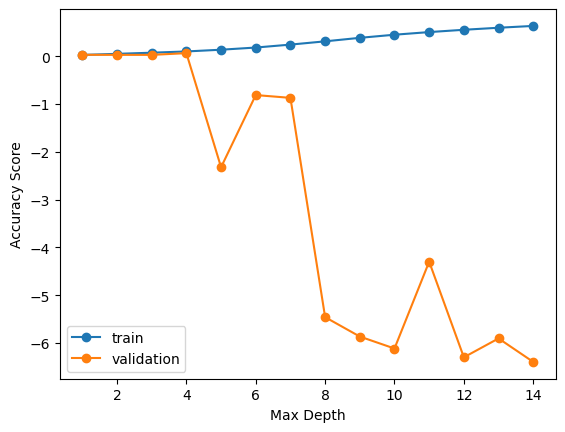

In [20]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Random Forest Model:

In [23]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [25]:
n_estimators_range = range(1, 21)
results = pd.DataFrame()
for estimator in n_estimators_range:
    rf = RandomForestRegressor(n_estimators = estimator)
    
    rf.fit(X_train, y_train)
    
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    
    results = results.append(
    {'n_estimators': estimator, 'train': train_score, 'validation': val_score}, ignore_index=True)
    
    print(estimator, end='\r')

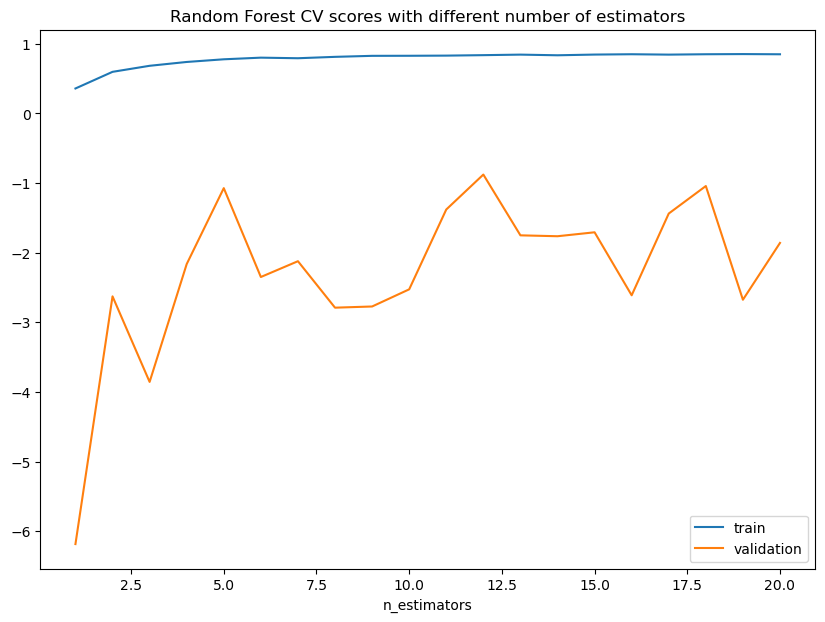

In [26]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.12976842908971586